In [123]:
import os
from minisom import MiniSom
import pandas as pd
import numpy as np
from collections import defaultdict
import pickle
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = '/net/fs04/d2/xgao/SOM'

In [3]:
som_shape = (3, 4)
x = som_shape[0]
y = som_shape[1]

In [120]:
# Change the variables here
var_list = ['h500', 'slp', 'ivt']
var_combo = 'h500_slp_ivt'

In [121]:
output_path = '../results/'+var_combo+'/'+str(x)+'x'+str(y)+'/'

In [122]:
output_path

'../results/h500_slp_ivt/3x4/'

In [23]:
def get_var(prod):
    dfs = []
    for var in var_list:
        df = pd.read_csv(data_path+'/'+prod+'/'+prod+'_daily_8019_SCUS_JFMAMOND_'+var+'_anom.txt', header = None, delim_whitespace=True)
        dfs.append(df)
    return dfs

In [8]:
def concat_df(df_list):
    comb_df = pd.concat(df_list, axis = 1)
    comb = comb_df.values
    return comb

In [9]:
def num_days_node(winmap):
    for cell in sorted(winmap.keys()):
        print(cell, len(winmap[cell]))

In [10]:
def get_winmap(data, som, return_indices = True):
    winmap = defaultdict(list)
    for i, j in enumerate(data):
        winmap[som.winner(j)].append(i+1 if return_indices else j)
    return winmap

In [11]:
def get_node_composites(som, data):
    winmap_patt = som.win_map(data)
    composites = {}
    for node in sorted(winmap_patt.keys()):
        composites[node] = np.mean(np.array(winmap_patt[node]), axis = 0)
    return composites

In [132]:
def save_day_list(winmap, prod):
    directory = output_path + prod
    if not os.path.exists(directory):
        os.makedirs(directory)
    with open(directory+'/'+prod+'_node_assignment.txt', 'w') as f:
        for item in sorted(winmap.items()):
            item = str(item)[1:-1]
            f.write("%s\n\n" % item)
    f.close()

In [135]:
def save_composites(prod, composites):
    directory = output_path + prod
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    with open(directory+'/'+prod+'_composites.json', 'wb') as f:
        pickle.dump(composites, f)
        f.close()

In [79]:
# for 3x4 or 4x3 figsize = ((15,12))
def plot_som(var, composites, reanalysis_product):
    plt.tight_layout()
    fig, axs = plt.subplots(nrows = som_shape[0], ncols = som_shape[1], figsize = (15,8))
    fig.suptitle(reanalysis_product+' '+var, fontsize=25, x=0.4, y=.92, horizontalalignment='left', verticalalignment='top',)

    index = var_list.index(var)
    for ax, node in zip(axs.flat, composites.keys()):
        im = ax.imshow(composites[node].reshape((len(var_list),41,49))[index], interpolation='nearest', cmap='hot')
    
    
    
    fig.subplots_adjust(top=0.88)
    
    plt.colorbar(im, ax=axs.ravel().tolist())
    plt.show()

In [68]:
(np.array([1,2,3,4,5,6,7,8,9,10,11,12]).reshape(3,2,2))

array([[[ 1,  2],
        [ 3,  4]],

       [[ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12]]])

In [72]:
composites_ERA5[(0,0)].reshape((len(var_list),41,49))[0].shape

(41, 49)

In [13]:
# def save_composites(reanalysis_product, composites):
#     filename = output_path + reanalysis_product + '_composites.json'
#     file = open(filename, 'wb')
#     pickle.dump(composites, file)
#     file.close()

In [95]:
#changed sigma from 0.5 and learning_rate from 0.5

#1, 0.01

sigma = 1
learning_rate = 0.01
neighbourhood_function = 'gaussian'
random_seed = 10
# iterations = 5000
# verbose = True

In [15]:
# rs = []
# for i in range(len(data_ERA5)):
#     r, _ = stats.pearsonr(data_ERA5[i], data_MERRA2[i])
#     rs.append(r)

In [16]:
# plt.plot(rs)
# print(np.mean(rs))

In [17]:
# rs = []
# for i in range(len(data_ERA5)):
#     r, _ = stats.pearsonr(data_ERA5[i], data_NARR[i])
#     rs.append(r)

In [18]:
# plt.plot(rs)
# print(np.mean(rs))

In [ ]:
dfs_ERA5 = get_var('ERA5')

ERA5 = concat_df(dfs_ERA5)
data_ERA5 = np.copy(ERA5)
np.random.seed(10)
# np.random.shuffle(data_ERA5)

input_len = data_ERA5.shape[1]
iterations = len(data_ERA5)*10

som_ERA5 = MiniSom(x , y, input_len, sigma=sigma, learning_rate=learning_rate,
              neighborhood_function=neighbourhood_function, random_seed=random_seed)
# som_ERA5.train_random(data_ERA5, iterations, verbose=True)
som_ERA5.train(data_ERA5, iterations, verbose=True)

In [25]:
winmap_ERA5 = get_winmap(ERA5, som_ERA5)

In [26]:
composites_ERA5 = get_node_composites(som_ERA5, data_ERA5)

In [136]:
save_composites('ERA5', composites_ERA5)

In [137]:
save_day_list(winmap_ERA5, 'ERA5')

In [28]:
# MERRA2
dfs_MERRA2 = get_var('MERRA2')

MERRA2 = concat_df(dfs_MERRA2)
data_MERRA2 = np.copy(MERRA2)
np.random.seed(10)
# np.random.shuffle(data_MERRA2)

input_len = data_MERRA2.shape[1]
iterations = len(data_MERRA2)*10

som_MERRA2 = MiniSom(x , y, input_len, sigma=sigma, learning_rate=learning_rate,
              neighborhood_function=neighbourhood_function, random_seed=random_seed)
# som_MERRA2.train_random(data_MERRA2, iterations, verbose=True)
som_MERRA2.train(data_MERRA2, iterations, verbose=True)

 [ 97300 / 97300 ] 100% - 0:00:00 left 
 quantization error: 53.12995120793487


In [29]:
winmap_MERRA2 = get_winmap(MERRA2, som_MERRA2)

In [30]:
composites_MERRA2 = get_node_composites(som_MERRA2, data_MERRA2)

In [31]:
# save_composites('MERRA2', composites_MERRA2)

In [ ]:
save_day_list(winmap_MERRA2, 'MERRA2')

In [32]:
learning_rate

0.01

In [33]:
# NARR
dfs_NARR = get_var('NARR')

NARR = concat_df(dfs_NARR)
data_NARR = np.copy(NARR)
np.random.seed(10)
# np.random.shuffle(data_NARR)

input_len = data_NARR.shape[1]
iterations = len(data_NARR)*10

som_NARR = MiniSom(x, y, input_len, sigma=sigma, learning_rate=learning_rate,
              neighborhood_function=neighbourhood_function, random_seed=random_seed)
# som_NARR.train_random(data_NARR, 5000, verbose=True)
som_NARR.train(data_NARR, iterations, verbose=True)

 [ 97300 / 97300 ] 100% - 0:00:00 left 
 quantization error: 52.99122226550665


In [34]:
winmap_NARR = get_winmap(NARR, som_NARR)

In [35]:
composites_NARR = get_node_composites(som_NARR, data_NARR)

In [36]:
# save_composites('NARR', composites_NARR)

In [ ]:
# save_day_list(winmap_NARR, 'NARR')

# Number of Days Per Node

In [37]:
num_days_node(winmap_ERA5)

(0, 0) 614
(0, 1) 829
(0, 2) 803
(0, 3) 750
(1, 0) 659
(1, 1) 902
(1, 2) 924
(1, 3) 746
(2, 0) 818
(2, 1) 928
(2, 2) 911
(2, 3) 846


In [38]:
num_days_node(winmap_MERRA2)

(0, 0) 909
(0, 1) 738
(0, 2) 781
(0, 3) 865
(1, 0) 860
(1, 1) 775
(1, 2) 803
(1, 3) 705
(2, 0) 838
(2, 1) 922
(2, 2) 823
(2, 3) 711


In [39]:
num_days_node(winmap_NARR)

(0, 0) 585
(0, 1) 805
(0, 2) 768
(0, 3) 727
(1, 0) 691
(1, 1) 896
(1, 2) 869
(1, 3) 781
(2, 0) 805
(2, 1) 933
(2, 2) 965
(2, 3) 905


# Common Number of Days

In [40]:
common_list_EM = []

for cell in sorted(winmap_ERA5.keys()):
    common = 0
    for i in winmap_ERA5[cell]:
        day = i
        if i in winmap_MERRA2[cell]:
            common += 1
    common_list_EM.append(common)



In [41]:
common_list_EN = []

for cell in sorted(winmap_ERA5.keys()):
    common = 0
    for i in winmap_ERA5[cell]:
        day = i
        if i in winmap_NARR[cell]:
            common += 1
    common_list_EN.append(common)

In [42]:
common_list_MN = []

for cell in sorted(winmap_MERRA2.keys()):
    common = 0
    for i in winmap_MERRA2[cell]:
        day = i
        if i in winmap_NARR[cell]:
            common += 1
    common_list_MN.append(common)


In [43]:
common_list_EM

[25, 0, 64, 0, 76, 133, 394, 9, 0, 0, 1, 0]

In [44]:
common_list_EN

[549, 720, 686, 674, 604, 757, 751, 657, 760, 806, 787, 771]

In [45]:
common_list_MN

[13, 0, 52, 0, 74, 111, 404, 9, 0, 0, 1, 0]

In [46]:
prod_common = {
    'EM': common_list_EM,
    'EN': common_list_EN,
    'MN':common_list_MN
}

# Percentage Common Days

In [47]:
def perc_common(winmap, comp):
    common_list = prod_common[comp]
    for i, cell in enumerate(sorted(winmap.keys())):
        num_days = len(winmap[cell])
        common = common_list[i]
        perc = (common/num_days)*100
        print(perc)

In [48]:
perc_common(winmap_ERA5, 'EM')

4.071661237785016
0.0
7.970112079701121
0.0
11.532625189681335
14.745011086474502
42.64069264069264
1.2064343163538873
0.0
0.0
0.10976948408342481
0.0


In [49]:
perc_common(winmap_ERA5, 'EN')

89.41368078175896
86.85162846803377
85.42963885429639
89.86666666666666
91.65402124430956
83.92461197339246
81.27705627705627
88.06970509383379
92.90953545232273
86.85344827586206
86.38858397365532
91.13475177304964


In [50]:
perc_common(winmap_MERRA2, 'EM')

2.7502750275027505
0.0
8.194622279129321
0.0
8.837209302325581
17.161290322580644
49.066002490660026
1.276595744680851
0.0
0.0
0.12150668286755771
0.0


In [51]:
perc_common(winmap_MERRA2, 'MN')

1.4301430143014302
0.0
6.658130601792574
0.0
8.604651162790699
14.32258064516129
50.31133250311333
1.276595744680851
0.0
0.0
0.12150668286755771
0.0


In [52]:
perc_common(winmap_NARR, 'EN')

93.84615384615384
89.44099378881988
89.32291666666666
92.70976616231087
87.4095513748191
84.48660714285714
86.42117376294591
84.12291933418695
94.40993788819875
86.38799571275455
81.55440414507773
85.19337016574585


In [53]:
perc_common(winmap_NARR, 'MN')

2.2222222222222223
0.0
6.770833333333333
0.0
10.709117221418236
12.388392857142858
46.49021864211738
1.1523687580025608
0.0
0.0
0.10362694300518134
0.0


# SOM Plots

<Figure size 432x288 with 0 Axes>

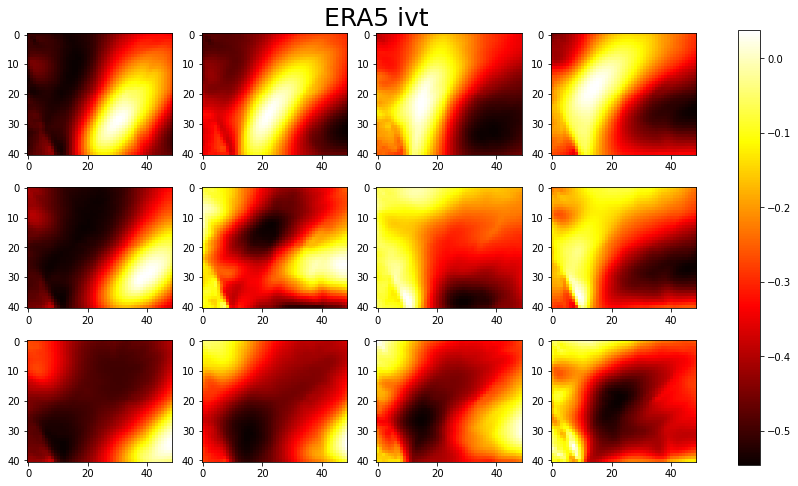

In [81]:
plot_som('ivt', composites_ERA5, 'ERA5')

<Figure size 432x288 with 0 Axes>

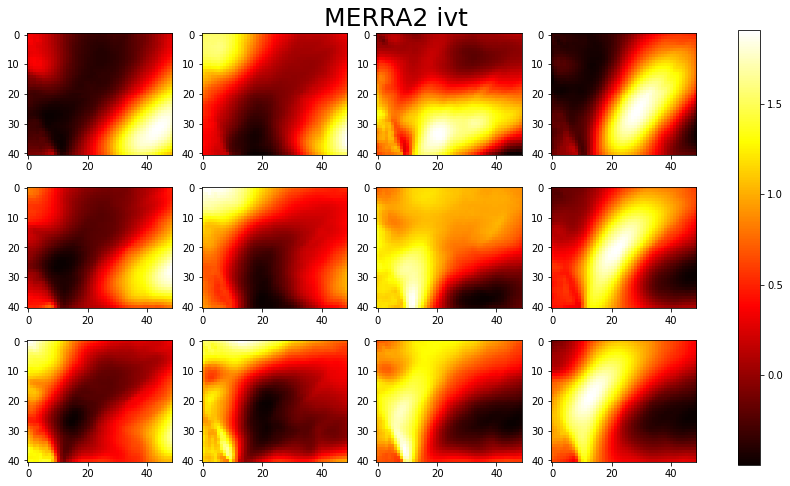

In [82]:
plot_som('ivt', composites_MERRA2, 'MERRA2')

<Figure size 432x288 with 0 Axes>

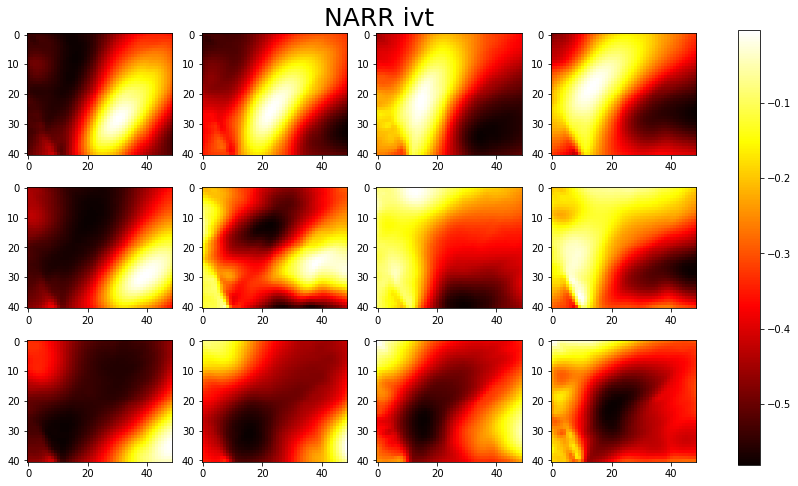

In [83]:
plot_som('ivt', composites_NARR, 'NARR')

# Correlation Analysis

In [84]:
for node in composites_ERA5.keys():
    patt_ERA5 = composites_ERA5[node]
    patt_MERRA2 = composites_MERRA2[node]
    print('ERA5 node {} MERRA2 node {}: {}'.format(node, node, np.round(stats.pearsonr(patt_ERA5, patt_MERRA2),3)))
    

ERA5 node (0, 0) MERRA2 node (0, 0): [0.356 0.   ]
ERA5 node (0, 1) MERRA2 node (0, 1): [-0.406  0.   ]
ERA5 node (0, 2) MERRA2 node (0, 2): [0.559 0.   ]
ERA5 node (0, 3) MERRA2 node (0, 3): [0.146 0.   ]
ERA5 node (1, 0) MERRA2 node (1, 0): [0.326 0.   ]
ERA5 node (1, 1) MERRA2 node (1, 1): [-0.083  0.   ]
ERA5 node (1, 2) MERRA2 node (1, 2): [0.66 0.  ]
ERA5 node (1, 3) MERRA2 node (1, 3): [0.073 0.   ]
ERA5 node (2, 0) MERRA2 node (2, 0): [0.285 0.   ]
ERA5 node (2, 1) MERRA2 node (2, 1): [0.456 0.   ]
ERA5 node (2, 2) MERRA2 node (2, 2): [-0.006  0.646]
ERA5 node (2, 3) MERRA2 node (2, 3): [-0.319  0.   ]


In [85]:
for node in composites_ERA5.keys():
    patt_ERA5 = composites_ERA5[node]
    patt_NARR = composites_NARR[node]
    print('ERA5 node {} NARR node {}: {}'.format(node, node, np.round(stats.pearsonr(patt_ERA5, patt_NARR),3)))

ERA5 node (0, 0) NARR node (0, 0): [0.998 0.   ]
ERA5 node (0, 1) NARR node (0, 1): [0.998 0.   ]
ERA5 node (0, 2) NARR node (0, 2): [0.998 0.   ]
ERA5 node (0, 3) NARR node (0, 3): [0.996 0.   ]
ERA5 node (1, 0) NARR node (1, 0): [0.994 0.   ]
ERA5 node (1, 1) NARR node (1, 1): [0.974 0.   ]
ERA5 node (1, 2) NARR node (1, 2): [0.986 0.   ]
ERA5 node (1, 3) NARR node (1, 3): [0.993 0.   ]
ERA5 node (2, 0) NARR node (2, 0): [0.997 0.   ]
ERA5 node (2, 1) NARR node (2, 1): [0.998 0.   ]
ERA5 node (2, 2) NARR node (2, 2): [0.999 0.   ]
ERA5 node (2, 3) NARR node (2, 3): [0.995 0.   ]


In [86]:
for node in composites_MERRA2.keys():
    patt_MERRA2 = composites_MERRA2[node]
    patt_NARR = composites_NARR[node]
    print('MERRA2 node {} NARR node {}: {}'.format(node, node, np.round(stats.pearsonr(patt_MERRA2, patt_NARR),3)))

MERRA2 node (0, 0) NARR node (0, 0): [0.331 0.   ]
MERRA2 node (0, 1) NARR node (0, 1): [-0.406  0.   ]
MERRA2 node (0, 2) NARR node (0, 2): [0.559 0.   ]
MERRA2 node (0, 3) NARR node (0, 3): [0.084 0.   ]
MERRA2 node (1, 0) NARR node (1, 0): [0.246 0.   ]
MERRA2 node (1, 1) NARR node (1, 1): [-0.223  0.   ]
MERRA2 node (1, 2) NARR node (1, 2): [0.694 0.   ]
MERRA2 node (1, 3) NARR node (1, 3): [0.026 0.04 ]
MERRA2 node (2, 0) NARR node (2, 0): [0.254 0.   ]
MERRA2 node (2, 1) NARR node (2, 1): [0.42 0.  ]
MERRA2 node (2, 2) NARR node (2, 2): [-0.008  0.551]
MERRA2 node (2, 3) NARR node (2, 3): [-0.374  0.   ]


In [87]:
for node_ERA5 in composites_ERA5.keys():
    patt_ERA5 = composites_ERA5[node_ERA5]
    for node_MERRA2 in composites_MERRA2.keys():
        if node_ERA5 == node_MERRA2:
            continue
        patt_MERRA2 = composites_MERRA2[node_MERRA2]
        r, _ = stats.pearsonr(patt_ERA5, patt_MERRA2)
        if r >= 0.5:
            print('ERA5 node {} MERRA2 node {}: {}'.format(node_ERA5, node_MERRA2, stats.pearsonr(patt_ERA5, patt_MERRA2)))

ERA5 node (0, 0) MERRA2 node (0, 2): (0.7724803693695685, 0.0)
ERA5 node (0, 0) MERRA2 node (0, 3): (0.9758641106321573, 0.0)
ERA5 node (0, 0) MERRA2 node (1, 3): (0.5466667751197637, 0.0)
ERA5 node (0, 1) MERRA2 node (0, 2): (0.7803821720168552, 0.0)
ERA5 node (0, 1) MERRA2 node (0, 3): (0.8723756529501657, 0.0)
ERA5 node (0, 1) MERRA2 node (1, 3): (0.9261384305954996, 0.0)
ERA5 node (0, 2) MERRA2 node (1, 2): (0.839626039212698, 0.0)
ERA5 node (0, 2) MERRA2 node (1, 3): (0.8586810585600392, 0.0)
ERA5 node (0, 2) MERRA2 node (2, 3): (0.951415718161271, 0.0)
ERA5 node (0, 3) MERRA2 node (1, 2): (0.8300543427416661, 0.0)
ERA5 node (0, 3) MERRA2 node (1, 3): (0.7936319720757029, 0.0)
ERA5 node (0, 3) MERRA2 node (2, 2): (0.6180319705578304, 0.0)
ERA5 node (0, 3) MERRA2 node (2, 3): (0.9925393235355752, 0.0)
ERA5 node (1, 0) MERRA2 node (0, 0): (0.8691653753577585, 0.0)
ERA5 node (1, 0) MERRA2 node (0, 3): (0.5955669543323062, 0.0)
ERA5 node (1, 1) MERRA2 node (0, 2): (0.7033723684139112,

In [88]:
for node_ERA5 in composites_ERA5.keys():
    patt_ERA5 = composites_ERA5[node_ERA5]
    for node_NARR in composites_NARR.keys():
        if (node_NARR == node_ERA5):
            continue
        patt_NARR = composites_NARR[node_NARR]
        r, _ = stats.pearsonr(patt_ERA5, patt_NARR)
        if r >= 0.5:
            print('ERA5 node {} NARR node {}: {}'.format(node_ERA5, node_NARR, stats.pearsonr(patt_ERA5, patt_NARR)))

ERA5 node (0, 0) NARR node (0, 1): (0.7761199152753517, 0.0)
ERA5 node (0, 0) NARR node (1, 0): (0.7458465274529151, 0.0)
ERA5 node (0, 0) NARR node (1, 1): (0.5232140063903563, 0.0)
ERA5 node (0, 1) NARR node (0, 0): (0.8081892069145873, 0.0)
ERA5 node (0, 1) NARR node (0, 2): (0.6705660823384151, 0.0)
ERA5 node (0, 2) NARR node (0, 1): (0.6808789932694793, 0.0)
ERA5 node (0, 2) NARR node (0, 3): (0.9443145295237055, 0.0)
ERA5 node (0, 3) NARR node (0, 1): (0.5651781900749792, 0.0)
ERA5 node (0, 3) NARR node (0, 2): (0.957972587648333, 0.0)
ERA5 node (1, 0) NARR node (0, 0): (0.6830223785605261, 0.0)
ERA5 node (1, 0) NARR node (2, 0): (0.6692176981306934, 0.0)
ERA5 node (1, 2) NARR node (1, 3): (0.9305624112076528, 0.0)
ERA5 node (1, 2) NARR node (2, 3): (0.5468442999019713, 0.0)
ERA5 node (1, 3) NARR node (0, 3): (0.5396451059213596, 0.0)
ERA5 node (1, 3) NARR node (1, 2): (0.9157990233165629, 0.0)
ERA5 node (1, 3) NARR node (2, 3): (0.5296342133082917, 0.0)
ERA5 node (2, 0) NARR nod

In [89]:
for node_MERRA2 in composites_MERRA2.keys():
    patt_MERRA2 = composites_MERRA2[node_MERRA2]
    for node_NARR in composites_NARR.keys():
        patt_NARR = composites_NARR[node_NARR]
        r, _ = stats.pearsonr(patt_MERRA2, patt_NARR)
        if r >= 0.9:
            print('MERRA2 node {} NARR node {}: {}'.format(node_MERRA2, node_NARR, stats.pearsonr(patt_MERRA2, patt_NARR)))

MERRA2 node (0, 0) NARR node (2, 0): (0.9452293839290511, 0.0)
MERRA2 node (0, 3) NARR node (0, 0): (0.9823410259647392, 0.0)
MERRA2 node (1, 3) NARR node (0, 1): (0.935923241320299, 0.0)
MERRA2 node (2, 0) NARR node (2, 2): (0.987993968550355, 0.0)
MERRA2 node (2, 0) NARR node (2, 3): (0.9200189270561339, 0.0)
MERRA2 node (2, 1) NARR node (2, 3): (0.9449717563855488, 0.0)
MERRA2 node (2, 2) NARR node (1, 2): (0.9145709520397005, 0.0)
MERRA2 node (2, 2) NARR node (1, 3): (0.9609480741678609, 0.0)
MERRA2 node (2, 3) NARR node (0, 2): (0.951742085128555, 0.0)
MERRA2 node (2, 3) NARR node (0, 3): (0.994264534122004, 0.0)


In [90]:
common = 0
for day in winmap_ERA5[0,1]:
    if day in winmap_MERRA2[2,0]:
        common+=1
print(common)

0


In [91]:
for node in winmap_ERA5.keys():
    if 0 in winmap_ERA5[node]:
        print(node)

In [92]:
stats.pearsonr(data_ERA5[2], data_ERA5[3])

(0.4762244053824069, 0.0)

In [108]:
with open('test_day_list.txt', 'w') as f:
    for node in sorted(winmap_ERA5.keys()):
        node_num = str(node)
        item = str(winmap_ERA5[node])
        f.write("%s\n\n" % item)

In [115]:
with open('test_day_list.txt', 'w') as f:
    for item in sorted(winmap_ERA5.items()):
        item = str(item)[1:-1]
        f.write("%s\n\n" % item)

In [109]:
for node in sorted(winmap_ERA5.items()):
    print(str(node))

((0, 0), [22, 25, 26, 65, 73, 84, 89, 90, 103, 104, 105, 116, 117, 144, 180, 200, 264, 271, 285, 307, 333, 390, 413, 420, 421, 457, 479, 482, 483, 484, 491, 500, 510, 518, 521, 527, 550, 570, 580, 582, 585, 614, 672, 698, 704, 727, 740, 751, 752, 762, 763, 794, 795, 796, 809, 816, 822, 827, 828, 829, 834, 853, 865, 872, 893, 894, 932, 935, 936, 939, 940, 945, 946, 948, 956, 964, 970, 991, 1017, 1031, 1038, 1053, 1060, 1061, 1067, 1086, 1097, 1099, 1140, 1146, 1160, 1166, 1234, 1248, 1249, 1250, 1253, 1307, 1312, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1420, 1427, 1428, 1429, 1430, 1441, 1442, 1496, 1497, 1501, 1532, 1533, 1538, 1624, 1636, 1662, 1668, 1682, 1683, 1713, 1718, 1721, 1722, 1724, 1736, 1749, 1762, 1763, 1786, 1787, 1788, 1789, 1791, 1902, 1928, 1930, 1965, 1966, 1992, 1996, 2010, 2015, 2055, 2090, 2133, 2149, 2155, 2156, 2242, 2254, 2284, 2315, 2380, 2387, 2394, 2408, 2433, 2440, 2454, 2458, 2462, 2468, 2474, 2480, 2486, 2507, 2508, 2509, 2551, 2562, 2620, 2624, 2643, 26

In [106]:
str(winmap_ERA5)

'd'

In [112]:
test_str = 'hello'

In [114]:
test_str[1:-1]

'ell'

In [98]:
# winmap_MERRA2

In [99]:
# winmap_NARR